In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy.stats as scs
sys.path.insert(0,'../scripts/')
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats

In [4]:
from ABTestingFunctions import ABTesting

In [5]:
df = pd.read_csv('../data/AdSmartABdata.csv')

In [6]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [7]:
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


<AxesSubplot:>

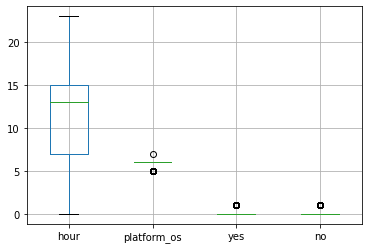

In [8]:
df.boxplot()

In [9]:
df_responded = df.query('yes==1 or no==1')

In [10]:
df_unresponded = df.query('yes==0 and no==0')

In [11]:
df_responded.shape, df_unresponded.shape,df.shape

((1243, 9), (6834, 9), (8077, 9))

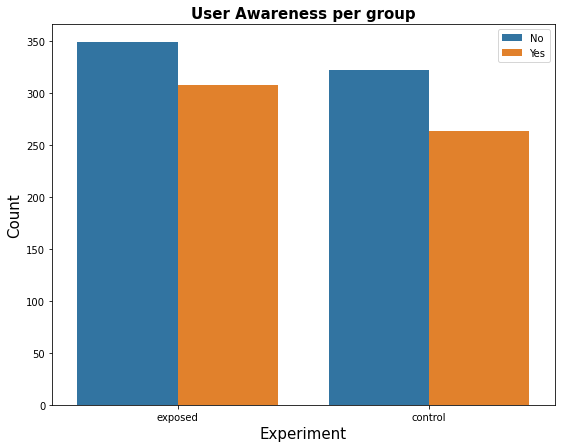

In [12]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x ='experiment', hue='yes', data = df_responded) 

ax.set_xlabel('Experiment', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('User Awareness per group', fontsize=15, fontweight='bold')
plt.legend( ['No', 'Yes'])



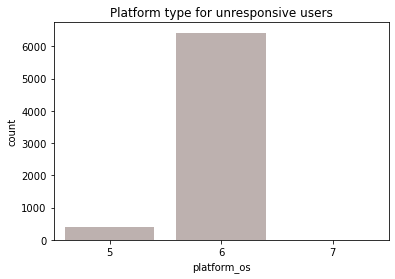

In [13]:
# class v / s fare barplot
sns.countplot(x ='platform_os', data = df_unresponded,
              color="salmon",
              saturation = 0.1)
# Show the plot
plt.title('Platform type for unresponsive users')
plt.show()

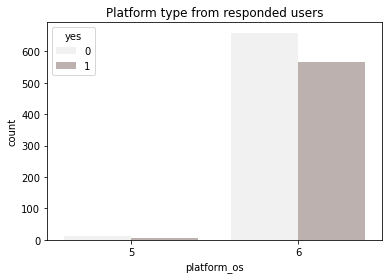

In [14]:
# class v / s fare barplot
sns.countplot(x ='platform_os', data = df_responded,
              color="salmon",
              hue = 'yes',
              saturation = 0.1)
plt.title('Platform type from responded users')
# Show the plot
plt.show()

# Hypothesis Testing

- Null Hypothesis(H_o): There is no difference in brand awareness between the exposed and control groups.
- Alternative Hypothesis(H_a): There is a significance difference in brand awareness between the exposed and control groups.


${AwarenessResult} = \tfrac{\text{Number of Yes}}{\text{Total number of events}}$

$H$<sub>o</sub> : $ControlAwarenessResult= ExposedGroupAwarenessResult$
<br/>
$H$<sub>a</sub> : $ControlAwarenessResult \neq ExposedGroupAwarenessResult$
<br/>
<br/>
Significance Level:  $\alpha=0.05$
<br/>
Significance Power:  $\beta = 0.2$
<br>

$BCR = $
<br/>
$MDE= $
<br/>

In [15]:
df_control =df_responded[df_responded['experiment']=='control']
df_exposed =df_responded[df_responded['experiment']=='exposed']

In [16]:
df_control.shape, df_exposed.shape

((586, 9), (657, 9))

In [17]:
# aggregate results per day 
df_exp_agg = (df_exposed.groupby('date').agg(yes=('yes','sum'),no=('no','sum')).reset_index())

In [18]:
df_exp_agg

,date,yes,no
0,2020-07-03,43,49
1,2020-07-04,46,45
2,2020-07-05,35,39
3,2020-07-06,23,25
4,2020-07-07,22,24
5,2020-07-08,58,61
6,2020-07-09,55,64
7,2020-07-10,26,42


In [19]:
df_ctrl_agg = (df_control.groupby('date').agg(yes=('yes','sum'),no=('no','sum')).reset_index())

In [20]:
df_ctrl_agg

,date,yes,no
0,2020-07-03,104,129
1,2020-07-04,30,38
2,2020-07-05,17,26
3,2020-07-06,12,14
4,2020-07-07,16,21
5,2020-07-08,27,31
6,2020-07-09,30,35
7,2020-07-10,28,28


In [21]:
exposed = df_exp_agg[['yes','no']]
control = df_ctrl_agg[['yes','no']]

In [22]:
control['awareness'] = control['yes']/(control['yes']+control['no'])
exposed['awareness'] = exposed['yes']/(exposed['yes']+exposed['no'])

In [23]:
exposed.head()

,yes,no,awareness
0,43,49,0.467391
1,46,45,0.505495
2,35,39,0.472973
3,23,25,0.479167
4,22,24,0.478261


<AxesSubplot:title={'center':'Distribution of yes and no in Exposed group in each consecutive day'}>

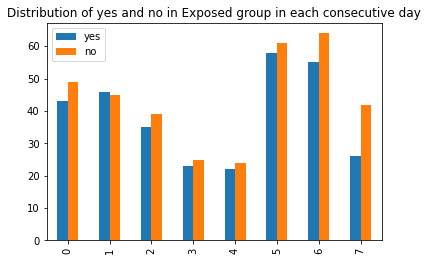

In [24]:
exposed[['yes','no']].plot(kind='bar',title='Distribution of yes and no in Exposed group in each consecutive day')

<AxesSubplot:title={'center':'Distribution of yes and no in Control group in each day'}>

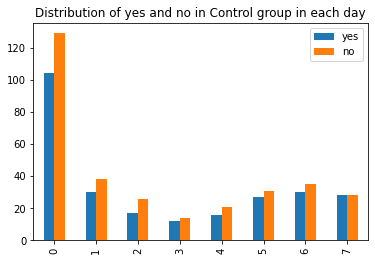

In [25]:
control[['yes','no']].plot(kind='bar',title='Distribution of yes and no in Control group in each day')

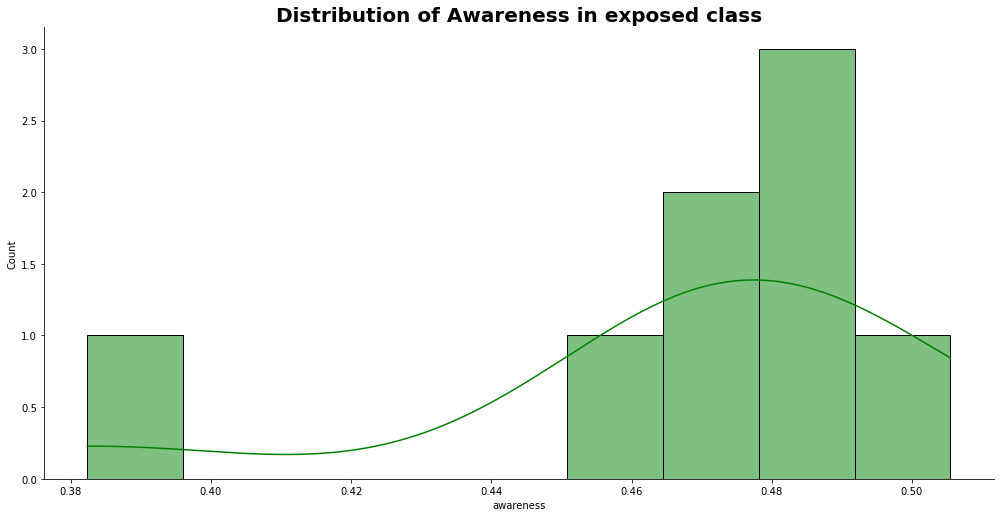

In [26]:
sns.displot(data=exposed, x='awareness', color='green',
                    kde=True, height=7, aspect=2)
plt.title(f'Distribution of Awareness in exposed class', size=20, fontweight='bold')
plt.show()

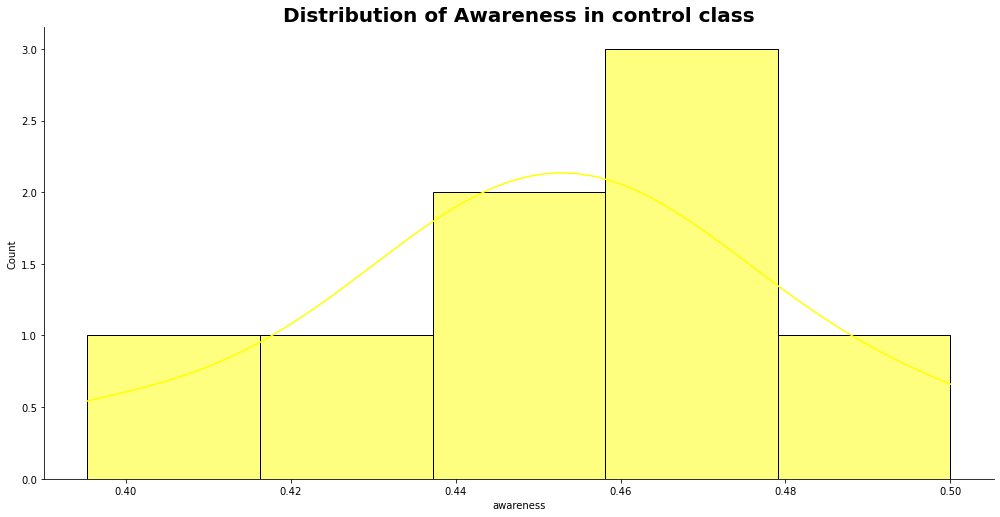

In [27]:
sns.displot(data=control, x='awareness', color='yellow',kde=True, height=7, aspect=2)
plt.title(f'Distribution of Awareness in control class', size=20, fontweight='bold')
plt.show()

## Distribution plot of the data
- This shows the data is normally distributed

In [28]:

exp_total = (exposed['yes'].sum()+exposed['no'].sum())
cont_total = (control['yes'].sum()+control['no'].sum())
C_aware = control['yes'].sum()
E_aware = exposed['yes'].sum()
exp_rate = E_aware/exp_total
cont_rate = C_aware/cont_total

fig, ax = plt.subplots(figsize=(12, 6))
xC = np.linspace(C_aware - 49, C_aware + 50, 100)
yC = scs.binom(cont_total, cont_rate).pmf(xC)
ax.bar(xC, yC, alpha=0.5, linestyle='--')
xE = np.linspace(E_aware - 49, E_aware + 50, 100)
yE = scs.binom(exp_total , exp_rate).pmf(xE)
ax.bar(xE, yE, alpha=0.5, linestyle='--')
plt.xlabel('awareness')
plt.ylabel('probability')
plt.show()

NameError: name 'cont_aware' is not defined

## Test the Hypothesis


In [ ]:
def compute_pvalues(group1, group2):
    n1 = (group1['no'].sum() + group1['yes'].sum())
    p1 = group1['yes'].sum() / float(n1)
    # 
    n2 = (group2['no'].sum() + group2['yes'].sum())
    p2 = group2['yes'].sum()  / float(n2)
    # 
    d= p2 - p1
    return (p1, p2, d)

In [ ]:
p1,p2,d = compute_pvalues(group1=control, group2=exposed)

In [ ]:
# Standard Deviation Error 
def compute_sd_errors(group1, group2):
    n1 = (group1['no'].sum() + group1['yes'].sum())
    n2 = (group2['no'].sum() + group2['yes'].sum()) 
    p_overall = (group1['yes'].sum() + group2['yes'].sum() )/ (n1+n2)
    se1 = (p_overall * (1 - p_overall))/n1 
    se2 = (p_overall * (1- p_overall))/n2 
    standardError = np.sqrt(float(se1) + float(se2)) 
    return standardError

In [ ]:
SD = compute_sd_errors(group1=control, group2=exposed)
print(SD)

0.028319932727228023


In [ ]:
def test3(group1, group2, SD, d):

    alpha = 0.05
    tStatistic = (d-0) / SD
# 
    n1 = (group1['no'].sum() + group1['yes'].sum())
    n2 = (group2['no'].sum() + group2['yes'].sum())
#     
    dof = (n1 + n2 - 2.0)
#     
    criticalValue = scipy.stats.t.ppf(1.0 - alpha, df = dof)
# Confidence Interval
    confInt = [d - (criticalValue * SD), d + (criticalValue * SD)]  
    p_val = (1 - scipy.stats.t.cdf(abs(tStatistic), df = (n1 + n2-2)) ) * 2.0
    return (tStatistic, dof, criticalValue, p_val)

In [ ]:
test3(group1=control, group2=exposed,SD=SD,d=d)


(0.645680181221037, 1241.0, 1.646082405507605, 0.5186058623605803)

In [ ]:

# conclusion on p value
# total success values
trial_successes = np.array([exposed['yes'].sum(), control['yes'].sum()])
# total arrays with [exposed,control ] pair
total = np.array([exposed['no'].sum() + exposed['yes'].sum(), control['no'].sum() + control['yes'].sum()])
# 
# compute t-value and p-value
zTest_statistic, zTest_pval = proportions_ztest(trial_successes, total, value=0, alternative='two-sided')
# 
print(f'Statistic value for z test: {round(zTest_statistic,4)}')
print(f'p-value for z test: {round(zTest_pval,4)}')

Statistic value for z test: 0.6457
p-value for z test: 0.5185


## Conclusion
- since the p-value is 0.5185 > significance level (0.05), is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis. so we fail to reject the Null Hypothesis (Ho)
